In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import minmax_scale  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.lines import Line2D
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error

In [2]:
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv('./wine_data.csv')

In [4]:
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [5]:
print("Shape of the dataframe: ",df.shape)

Shape of the dataframe:  (178, 14)


In [6]:
df.isna().sum() #no missing value

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [180]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [181]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [182]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [183]:
df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0  
5                          2.85   1450.0       0  
6                          3.58   1290.0       0  
7                          3.58   1295.0       0  
8                          2.85   1045.0       0  
9                          3.55   1045.0       0

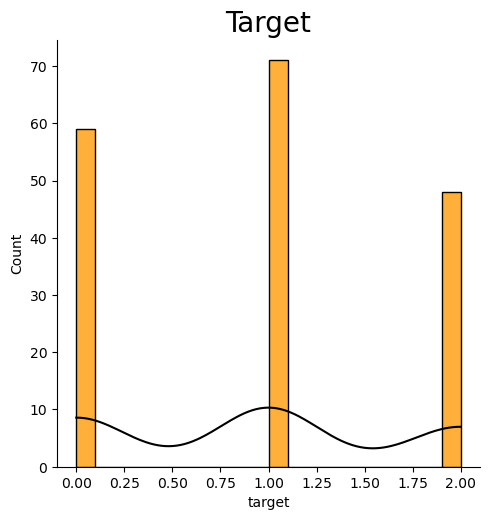

In [184]:
sns.displot(x=df['target'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Target",size=20)
plt.show()

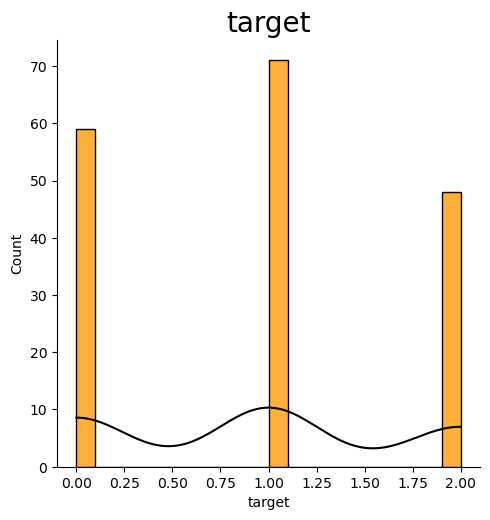

In [185]:
sns.displot(x=df2['target'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("target",size=20)
plt.show()

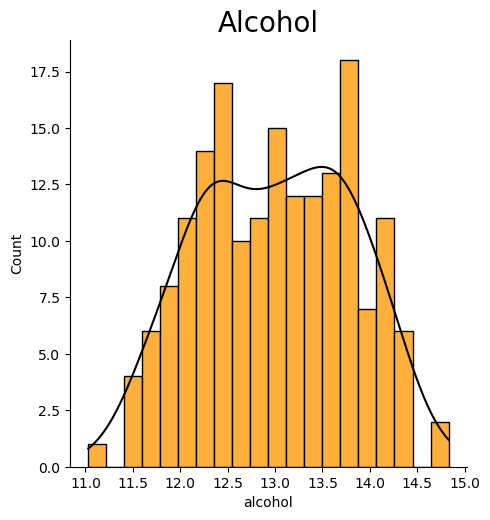

In [186]:
sns.displot(x=df['alcohol'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Alcohol",size=20)
plt.show()

In [25]:
sns.pairplot(data=df,hue='target')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000219B6A34790> (for post_execute):


KeyboardInterrupt: 

In [187]:
df['target'].unique()

array([0, 1, 2], dtype=int64)

In [188]:
pd.value_counts(df['target'])

1    71
0    59
2    48
Name: target, dtype: int64

In [189]:
df.duplicated().any()

False

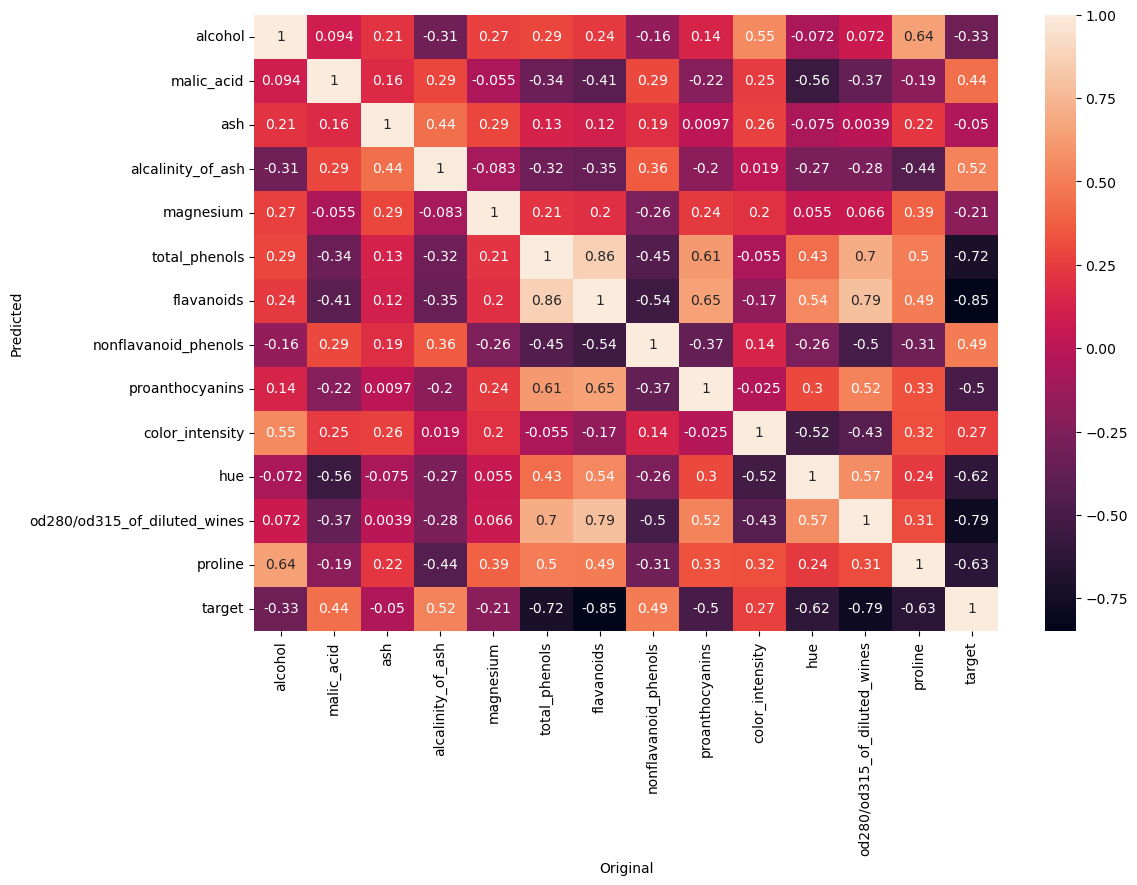

In [89]:
#expected heatmap when we run the data colums against themselves
plt.figure(figsize=(12,8)) #create a 12x8 plot 
sns.heatmap(df.corr(),annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [15]:
#feature selection
X=df.drop(['target'], axis=1)
X

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [192]:
#selecting sub  attributes
Xn=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids']

In [193]:
sub_features=df[Xn]

In [194]:
sub_features.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  
0        3.06  
1        2.76  
2        3.24  
3        3.49  
4        2.69

In [195]:
y.unique()

array([0, 1, 2], dtype=int64)

In [196]:
X = minmax_scale(X) #scalling if i want to use the all attributes

In [148]:
X = minmax_scale(sub_features) #when i wish to use sub feature or attributes

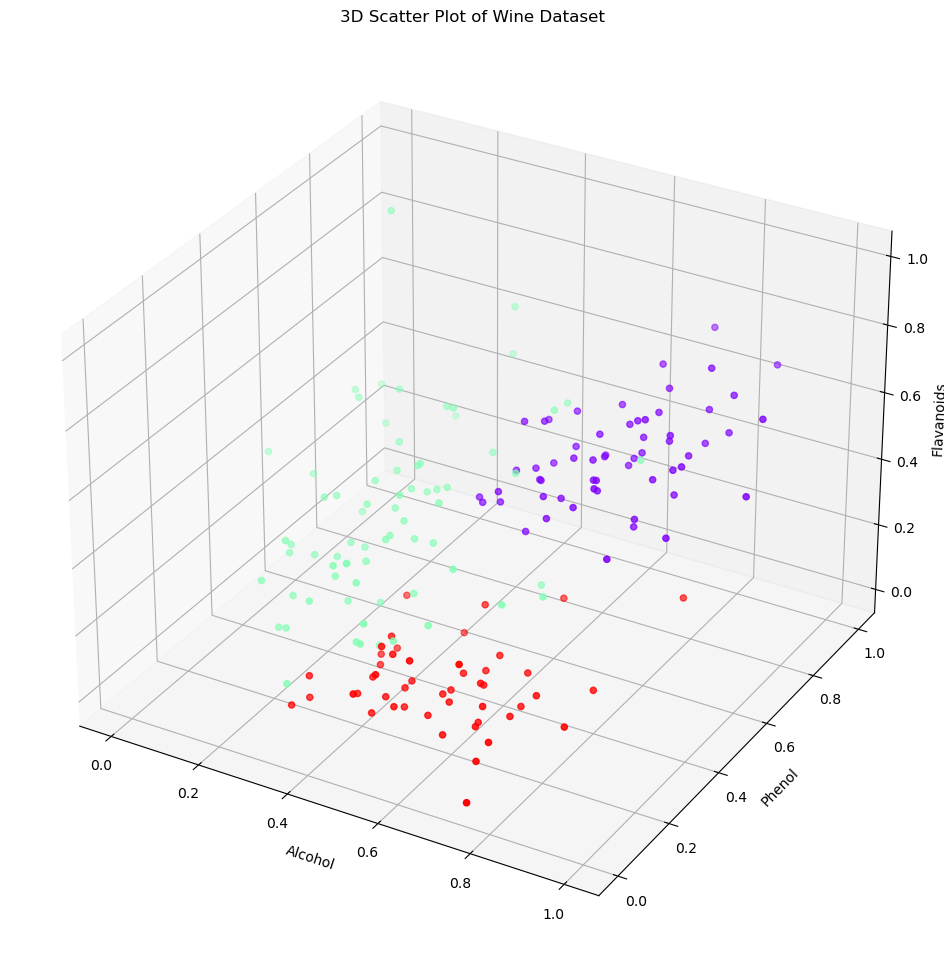

In [197]:
# Extract the desired attributes
# displaying 3d of some of the attributes and where they are group
alcohol = X[:, 0]
phenol = X[:, 5]
flavanoids = X[:, 6]

# Create a figure and subplot
fig = plt.figure(1, figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(alcohol, phenol, flavanoids, c=y, cmap='rainbow')

# Set labels and title
ax.set_xlabel('Alcohol')
ax.set_ylabel('Phenol')
ax.set_zlabel('Flavanoids')
plt.title('3D Scatter Plot of Wine Dataset')

# Display the plot
plt.show()


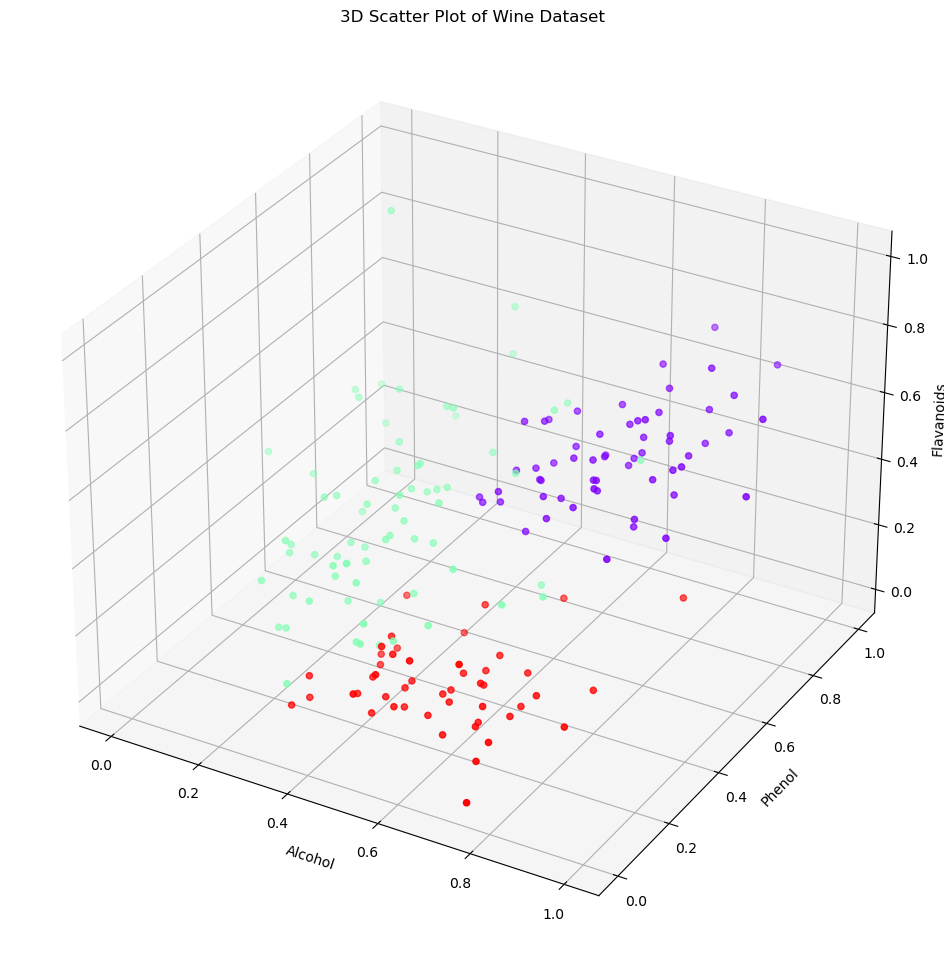

In [198]:
# Extract the desired attributes
alcohol = X[:, 0]
phenol = X[:, 5]
flavanoids = X[:, 6]

# Create a figure and subplot
fig = plt.figure(1, figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(alcohol, phenol, flavanoids, c=y, cmap='rainbow')

# Set labels and title
ax.set_xlabel('Alcohol')
ax.set_ylabel('Phenol')
ax.set_zlabel('Flavanoids')
plt.title('3D Scatter Plot of Wine Dataset')

# Display the plot
plt.show()


In [200]:
# Create Train and Test data
#manual with 75:25 dataset spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

0.2

In [201]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (133, 13)
y_train (133,)
X_test (45, 13)
y_test (45,)


In [203]:
# Define the parameter grid
#manual grid 
dtree_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 3, 4, 5, 6, 9],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7]
}

# Create the GridSearchCV object
dtree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dtree_grid,
    cv=10
)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Decision Tuned Hyperparameters:", dtree.best_params_)
print("Decision Tuned Best Score:", round(dtree.best_score_, 3))


Decision Tuned Hyperparameters: {'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 2}
Decision Tuned Best Score: 0.9462


Decision Tuned Hyperparameters for test size 0.2: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tuned Best Score for test size 0.2: 0.9
Decision Tree (DT) Classification Accuracy for test size 0.2: 94.44%
Kappa Statistics for test size 0.2: 0.914
Mean Absolute Error (MAE) for test size 0.2: 0.083
Root Mean Squared Error (RMSE) for test size 0.2: 0.373
Relative Absolute Error (RAE) for test size 0.2: 10.0%
Relative Root Squared Error (RRSE) for test size 0.2: 44.72%
---------------------------------------------


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

---------------------------------------------


[10 11]


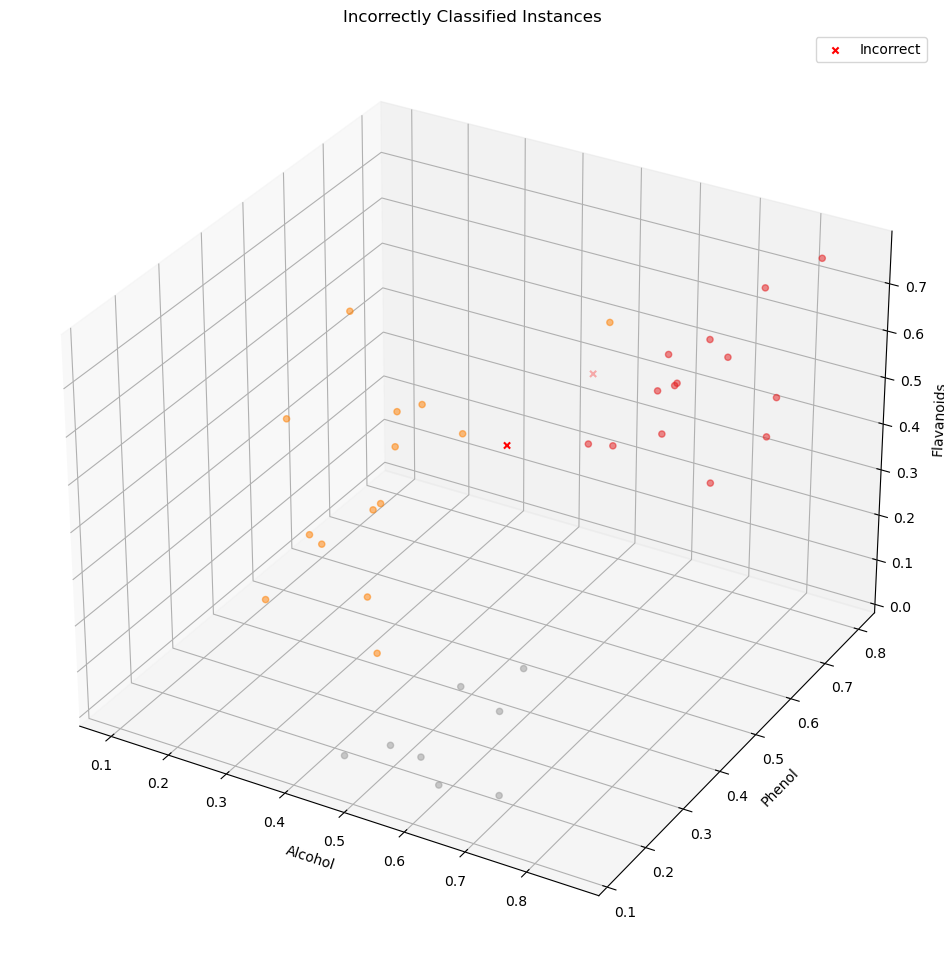

---------------------------------------------


Number of leaves :  7
Number of trees :  13


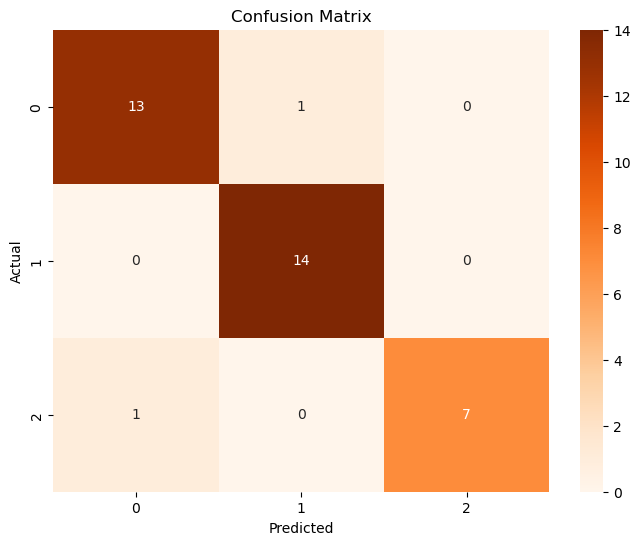

Decision Tuned Hyperparameters for test size 0.25: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tuned Best Score for test size 0.25: 0.924
Decision Tree (DT) Classification Accuracy for test size 0.25: 95.56%
Kappa Statistics for test size 0.25: 0.932
Mean Absolute Error (MAE) for test size 0.25: 0.067
Root Mean Squared Error (RMSE) for test size 0.25: 0.333
Relative Absolute Error (RAE) for test size 0.25: 7.14%
Relative Root Squared Error (RRSE) for test size 0.25: 35.71%
---------------------------------------------


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

---------------------------------------------


[10 11]


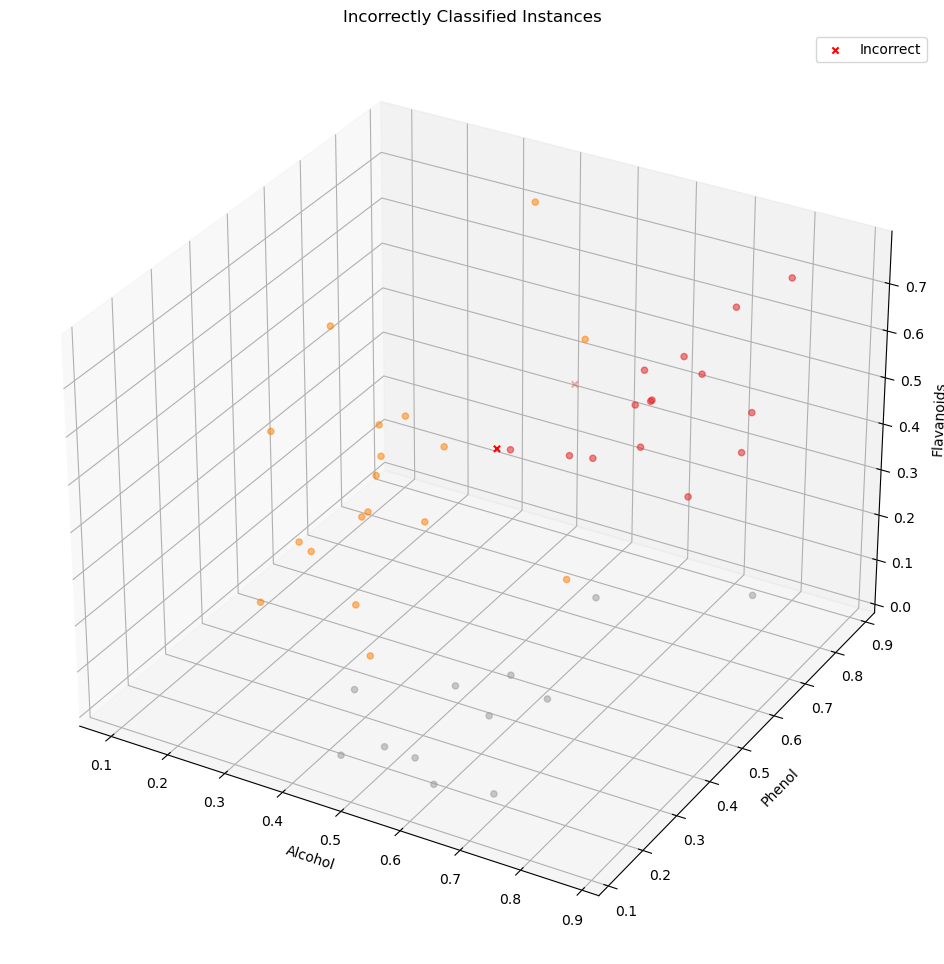

---------------------------------------------


Number of leaves :  7
Number of trees :  13


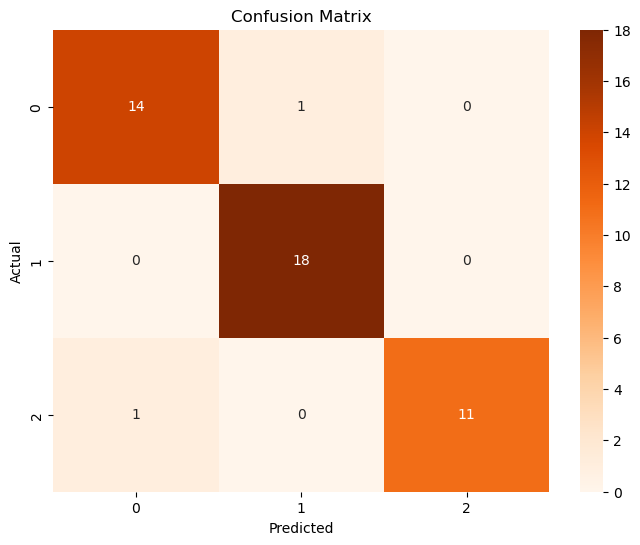

Decision Tuned Hyperparameters for test size 0.3: {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tuned Best Score for test size 0.3: 0.937
Decision Tree (DT) Classification Accuracy for test size 0.3: 96.3%
Kappa Statistics for test size 0.3: 0.943
Mean Absolute Error (MAE) for test size 0.3: 0.056
Root Mean Squared Error (RMSE) for test size 0.3: 0.304
Relative Absolute Error (RAE) for test size 0.3: 6.12%
Relative Root Squared Error (RRSE) for test size 0.3: 33.53%
---------------------------------------------


              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

---------------------------------------------


[10 11]


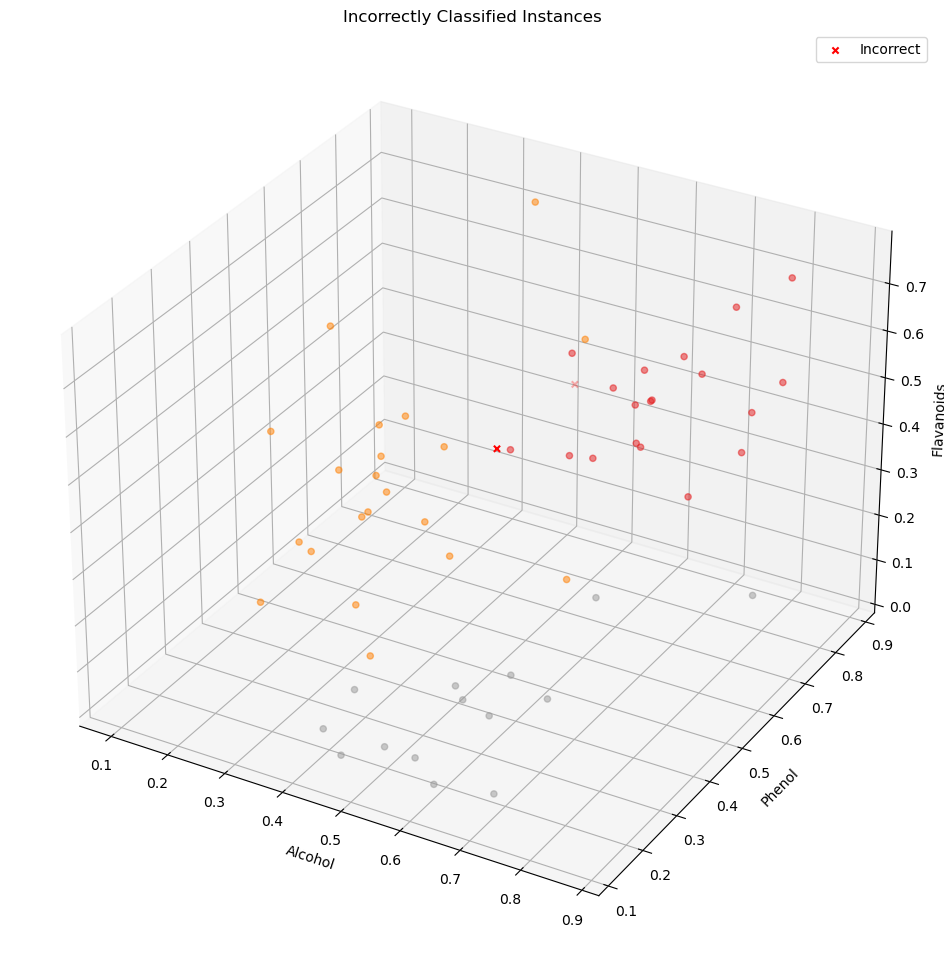

---------------------------------------------


Number of leaves :  7
Number of trees :  13


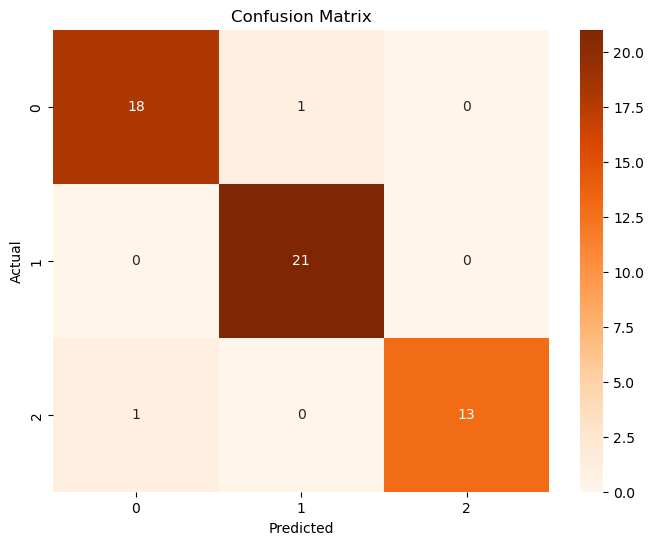

In [213]:
# looping several dataset split Define the test sizes
test_sizes = [0.2, 0.25, 0.3]

for test_size in test_sizes:
        
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Define the parameter grid
    dtree_grid = {
        "criterion": ["gini"],
        "min_samples_split": [2],
        "min_samples_leaf": [1]
    }
    
    # Create the GridSearchCV object
    dtree = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=dtree_grid,
        cv=10
    )
    
    # Fit the model to the training data
    dtree.fit(X_train, y_train)
    
    # Print the best hyperparameters and best score
    print("Decision Tuned Hyperparameters for test size {}: {}".format(test_size, dtree.best_params_))
    print("Decision Tuned Best Score for test size {}: {}".format(test_size, round(dtree.best_score_, 3)))
    
    # Use best classification model
    best_clf_dt = dtree.best_estimator_
    best_clf_dt.fit(X_train, y_train)
    dtree_y_head = best_clf_dt.predict(X_test)
    
    # Calculate accuracy
    accuracy = best_clf_dt.score(X_test, y_test)
    print("Decision Tree (DT) Classification Accuracy for test size {}: {}%".format(test_size, round(accuracy*100, 2)))
    
    # Calculate Kappa statistics
    kappa = cohen_kappa_score(y_test, dtree_y_head)
    print("Kappa Statistics for test size {}: {}".format(test_size, round(kappa, 3)))
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, dtree_y_head)
    print("Mean Absolute Error (MAE) for test size {}: {}".format(test_size, round(mae, 3)))
    
    # Calculate RMSE
    rmse = mean_squared_error(y_test, dtree_y_head, squared=False)
    print("Root Mean Squared Error (RMSE) for test size {}: {}".format(test_size, round(rmse, 3)))
    
    # Calculate RAE
    rae = mean_absolute_error(y_test, dtree_y_head) / np.mean(y_test)
    print("Relative Absolute Error (RAE) for test size {}: {}%".format(test_size, round(rae*100, 2)))
    
    
    # Calculate RRSE
    rrse = np.sqrt(mean_squared_error(y_test, dtree_y_head)) / np.mean(y_test)
    print("Relative Root Squared Error (RRSE) for test size {}: {}%".format(test_size, round(rrse*100, 2)))
    
    print("---------------------------------------------")
    print()
    print()
    
    print(classification_report(y_test, dtree_y_head))
    
    print("---------------------------------------------")
    print()
    print()
    
    
    # Assuming you have already trained the decision tree model and obtained the predictions
    plot_incorrect_classification_3d(X_test, y_test, dtree_y_head, title="Incorrectly Classified Instances")
    
        
    
    # Assuming you have already trained the decision tree model and obtained the predictions
    confusion_mtx = confusion_matrix(y_test, dtree_y_head)
    
    print("---------------------------------------------")
    print()
    print()
    num_leaves = best_clf_dt.tree_.n_leaves
    tree_size = best_clf_dt.tree_.node_count
    print("Number of leaves : ", num_leaves)
    print("Number of trees : ", tree_size)

    # Create a heatmap of the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Oranges")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



[10 11]


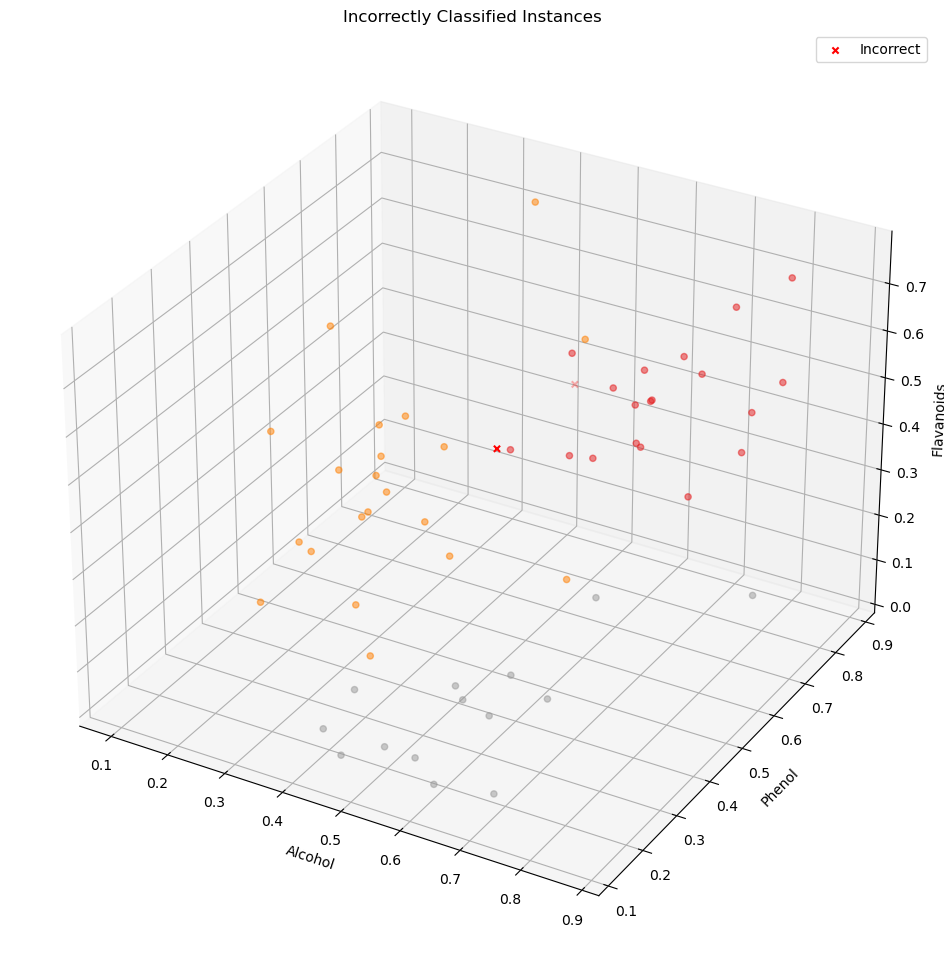

In [212]:
# Show Incorrect Classification

def plot_incorrect_classification_3d(X_test, y_test, y_pred, title="Incorrectly Classified Instances"):
    incorrect_indices = np.where(y_test != y_pred)[0]
    print(incorrect_indices)

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X_test[:, 0], X_test[:, 5], X_test[:, 6], c=y_test, cmap=plt.cm.Set1, alpha=0.5)
    ax.scatter(X_test[incorrect_indices, 0], X_test[incorrect_indices, 6], X_test[incorrect_indices, 2],
               c='red', marker='x', label='Incorrect')

    ax.set_xlabel("Alcohol")
    ax.set_ylabel("Phenol")
    ax.set_zlabel("Flavanoids")
    ax.set_title(title)
    ax.legend()

    plt.show()

# Assuming you have already trained the decision tree model and obtained the predictions
plot_incorrect_classification_3d(X_test, y_test, dtree_y_head, title="Incorrectly Classified Instances")


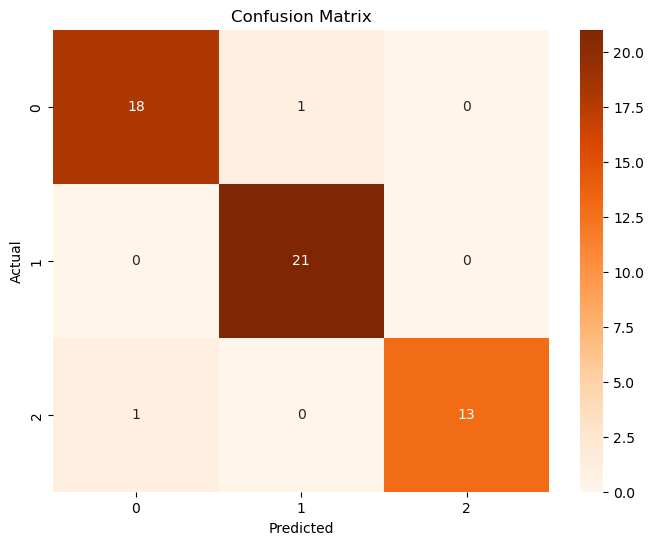

In [208]:
# Assuming you have already trained the decision tree model and obtained the predictions
confusion_mtx = confusion_matrix(y_test, dtree_y_head)

# Create a heatmap of the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [178]:
#using the wine dataset without downloading
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data[:, [0, 6]]  # Selecting only Alcohol and Flavanoids attributes
y = wine_data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 91.67%


In [209]:
print(X)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


In [210]:
help(wine_data.data)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [211]:
wine_data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [200]:
#creating wine dataset
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

# Create a pandas DataFrame from the data and target
df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

# Save the DataFrame as a CSV file
df.to_csv('wine_data.csv', index=False)


In [2]:
# #creating wine dataset
# import pandas as pd
# from sklearn.datasets import load_wine

# # Load the Wine dataset
# wine_data = load_wine()

# # Create a pandas DataFrame from the data and target
# df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)
# df['target'] = wine_data.target

# # Save the DataFrame as a CSV file
# df.to_csv('wine_data.csv', index=False)


import pandas as pd
import requests

# URL of the Column Vertebral dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/vertebral-column/column_vertebra.data'

# Download the dataset
response = requests.get(url)

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data=response.data,columns=wine_data.feature_names)

# Save the DataFrame as a CSV file
df.to_csv('column_vertebral_data.csv', index=False)


AttributeError: 'Response' object has no attribute 'data'

In [7]:
#print the wine data
#creating wine dataset
import pandas as pd
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()

wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
wine_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
wine_data.transform
    

1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29   5.64  1.04  \
0    1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
1    1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
2    1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
3    1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
4    1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.75  1.05   
..  ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
172  3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
173  3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
174  3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
175  3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
176  3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

     3.92  1065  
0    3.40  1050  
1    3.17  1185  
2    3.45  1480  
3    2.93   735  
4    2.85  1450  
..    ...   ...  
172  1.74   740  
173  1.56   750  
174  1.56   835  
175  1.62   840  
176  1.60   560  

[177 rows x 14 columns]